In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import tensorflow
import keras

In [2]:
wmt = yf.download('WMT', start='2019-12-01', end='2020-11-18')

[*********************100%***********************]  1 of 1 completed


In [3]:
wmt.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,119.150002,119.379997,117.839996,119.279999,117.224564,5670900
2019-12-03,118.400002,118.959999,117.769997,118.669998,116.625069,6594800
2019-12-04,119.120003,119.199997,118.300003,118.690002,116.644730,5556600


In [9]:
wmt = wmt.drop(columns=['Adj Close'])

In [10]:
wmt.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-02,119.150002,119.379997,117.839996,119.279999,5670900
2019-12-03,118.400002,118.959999,117.769997,118.669998,6594800
2019-12-04,119.120003,119.199997,118.300003,118.690002,5556600


In [11]:
wmt.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [12]:
wmt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2019-12-02 to 2020-11-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    244 non-null    float64
 1   High    244 non-null    float64
 2   Low     244 non-null    float64
 3   Close   244 non-null    float64
 4   Volume  244 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 21.4 KB


In [13]:
wmt['Volume'] = wmt['Volume'].astype(float)

In [14]:
wmt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2019-12-02 to 2020-11-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    244 non-null    float64
 1   High    244 non-null    float64
 2   Low     244 non-null    float64
 3   Close   244 non-null    float64
 4   Volume  244 non-null    float64
dtypes: float64(5)
memory usage: 21.4 KB


In [15]:
wmt.to_csv('wmt_stock_data.csv')

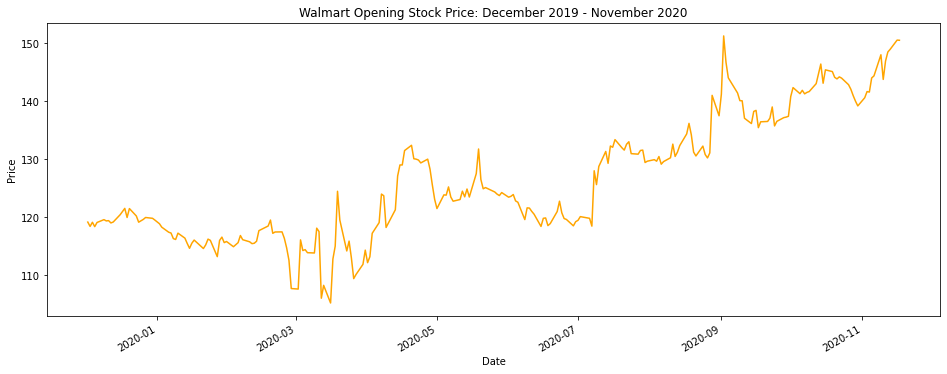

In [20]:
wmt['Open'].plot(figsize=(16, 6), color = 'orange')
plt.title('Walmart Opening Stock Price: December 2019 - November 2020')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [23]:
wmt.rolling(7).mean().head(15)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-02,NaN,NaN,NaN,NaN,NaN
2019-12-03,NaN,NaN,NaN,NaN,NaN
2019-12-04,NaN,NaN,NaN,NaN,NaN
2019-12-05,NaN,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN,NaN
2019-12-09,NaN,NaN,NaN,NaN,NaN
2019-12-10,119.004287,119.362856,118.349998,119.082857,5.087743e+06
2019-12-11,119.040001,119.401428,118.448570,119.042858,4.778529e+06
2019-12-12,119.125715,119.565714,118.578571,119.198572,4.429129e+06


Text(0, 0.5, 'Price')

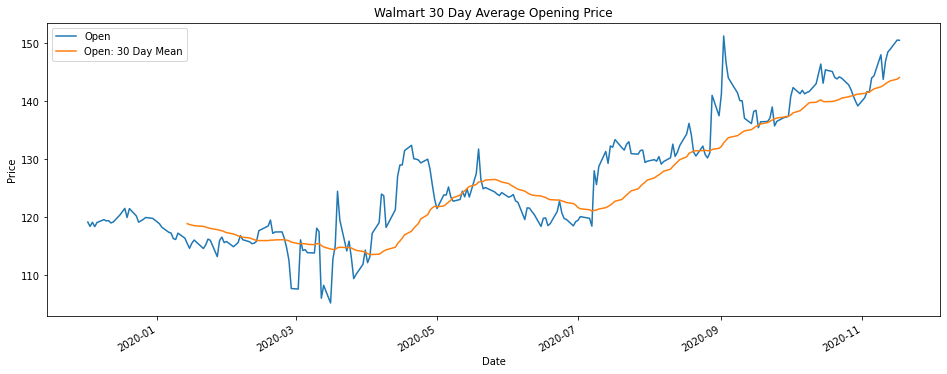

In [24]:
wmt['Open: 30 Day Mean'] = wmt['Open'].rolling(window=30).mean()
wmt[['Open', 'Open: 30 Day Mean']].plot(figsize=(16, 6))
plt.title('Walmart 30 Day Average Opening Price')
plt.xlabel('Date')
plt.ylabel('Price')

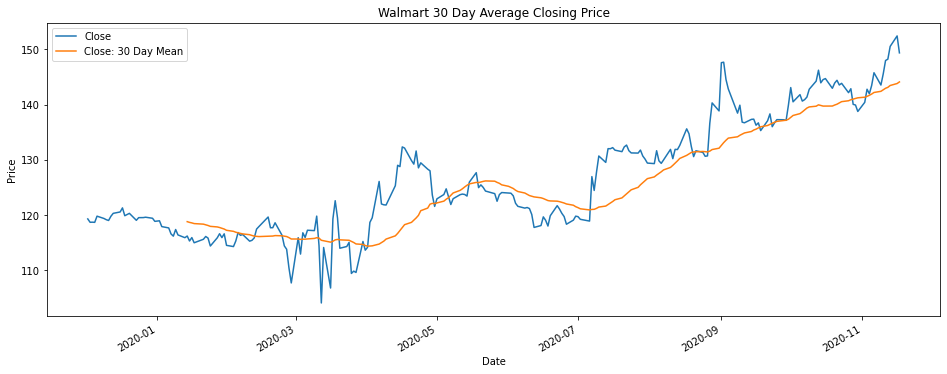

In [25]:
wmt['Close: 30 Day Mean'] = wmt['Close'].rolling(window=30).mean()
wmt[['Close', 'Close: 30 Day Mean']].plot(figsize=(16, 6))
plt.title('Walmart 30 Day Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [26]:
wmt_training_set = wmt['Close']
wmt_training_set = pd.DataFrame(wmt_training_set)

In [28]:
from sklearn.preprocessing import MinMaxScaler
wmt_scale = MinMaxScaler(feature_range = (0, 1))
wmt_training_set_scaled = wmt_scale.fit_transform(wmt_training_set)

In [30]:
X_train = []
y_train = []
for i in range(30, 223):
    X_train.append(wmt_training_set_scaled[i-30:i,0])
    y_train.append(wmt_training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [32]:
regressor = Sequential()

In [33]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [70]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=250, batch_size=96)

Epoch 1/250
3/3 [==============================] - 0s 68ms/step - loss: 0.0049
Epoch 2/250
3/3 [==============================] - 0s 66ms/step - loss: 0.0057
Epoch 3/250
3/3 [==============================] - 0s 56ms/step - loss: 0.0055
Epoch 4/250
3/3 [==============================] - 0s 61ms/step - loss: 0.0061
Epoch 5/250
3/3 [==============================] - 0s 48ms/step - loss: 0.0050
Epoch 6/250
3/3 [==============================] - 0s 51ms/step - loss: 0.0049
Epoch 7/250
3/3 [==============================] - 0s 51ms/step - loss: 0.0055
Epoch 8/250
3/3 [==============================] - 0s 51ms/step - loss: 0.0055
Epoch 9/250
3/3 [==============================] - 0s 53ms/step - loss: 0.0062
Epoch 10/250
3/3 [==============================] - 0s 47ms/step - loss: 0.0047
Epoch 11/250
3/3 [==============================] - 0s 52ms/step - loss: 0.0054
Epoch 12/250
3/3 [==============================] - 0s 46ms/step - loss: 0.0051
Epoch 13/250
3/3 [==============================]

In [71]:
wmt_test = pd.read_csv('wmt_test.csv', index_col= 'Date', parse_dates=True)

In [72]:
wmt_test.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-19,145.100006,145.369995,142.750000,142.949997,4881100
2020-10-20,144.110001,145.529999,143.619995,143.899994,4841000
2020-10-21,143.839996,145.729996,143.839996,144.399994,4371400


In [73]:
real_prc_wmt = wmt_test.iloc[:, 1:2].values

In [74]:
wmt_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2020-10-19 to 2020-11-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    21 non-null     float64
 1   High    21 non-null     float64
 2   Low     21 non-null     float64
 3   Close   21 non-null     float64
 4   Volume  21 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1008.0 bytes


In [75]:
wmt_test['Volume'] = wmt_test['Volume'].astype(float)

In [76]:
wmt_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2020-10-19 to 2020-11-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    21 non-null     float64
 1   High    21 non-null     float64
 2   Low     21 non-null     float64
 3   Close   21 non-null     float64
 4   Volume  21 non-null     float64
dtypes: float64(5)
memory usage: 1008.0 bytes


In [77]:
wmt_test_set = wmt_test['Open']
wmt_test_set = pd.DataFrame(wmt_test_set)

In [78]:
wmt_total = pd.concat((wmt['Open'], wmt_test_set['Open']), axis = 0)
inputs = wmt_total[len(wmt_total) - len(wmt_test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = wmt_scale.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
wmt_predicted_stock_price = regressor.predict(X_test)
wmt_predicted_stock_price = wmt_scale.inverse_transform(wmt_predicted_stock_price)

In [79]:
wmt_predicted_stock_price = pd.DataFrame(predicted_stock_price)
wmt_predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


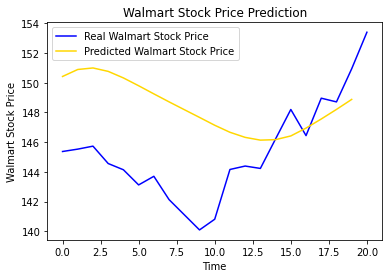

In [82]:
plt.plot(real_prc_wmt, color = 'blue', label = 'Real Walmart Stock Price')
plt.plot(wmt_predicted_stock_price, color = 'gold', label = 'Predicted Walmart Stock Price')
plt.title('Walmart Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Walmart Stock Price')
plt.legend()
plt.show()